[14262 10766 20370 23777 19553]



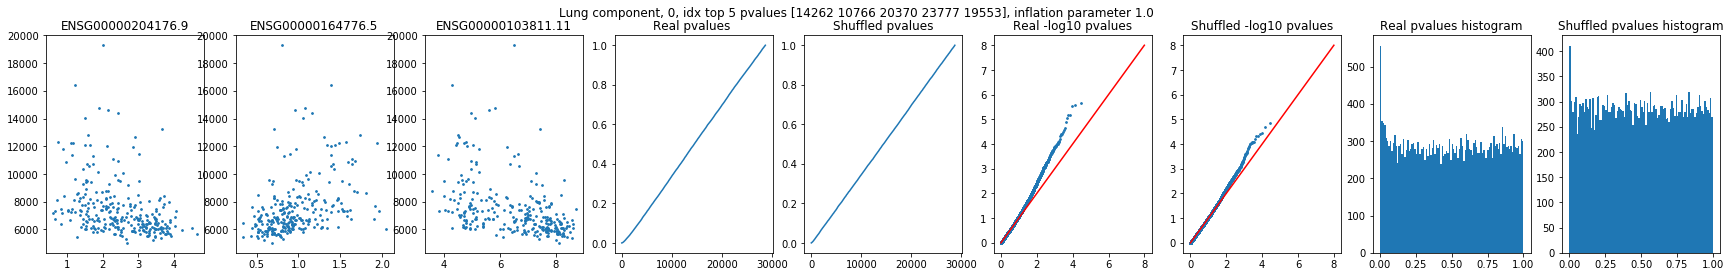

In [48]:

import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
# sys.path = ['/hps/nobackup/research/stegle/users/willj/GTEx/deps/qvalue/qvalue'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
import os
%matplotlib inline
from qvalue.qvalue import estimate as qestimate

component = 0
tissue = 'Lung'

# 'data/processed/association_results/expression/inception_50_-1.h5/Lung/mean/component1_sh{}_fl0.py'.format(component)
real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,component),'rb'))[1])
shuffled_data = pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh1_fl0.py'.format(tissue,component),'rb'))
shuffled_idx = np.array(shuffled_data[0])
shuffled_pvalues = np.array(shuffled_data[1])
[X_matrix, y_pheno] = pickle.load(open('../data/processed/association_data/expression/inception_50_-1.h5/small/{}/X_y_mean'.format(tissue),'rb'))



if tissue == 'Artery - Tibial':
    tissue_filename = 'Artery_Tibial'
elif tissue == 'Heart - Left Ventricle':
    tissue_filename = 'Heart_Left_Ventricle'
elif tissue == 'Breast - Mammary Tissue':
    tissue_filename = 'Breast_Mammary_Tissue'
elif tissue == 'Brain - Cerebellum':
    tissue_filename = 'Brain_Cerebellum'
else:
    tissue_filename = tissue

sorted_pvalues_idx = np.argsort(real_pvalues)
print (sorted_pvalues_idx[0:5])

tissue_expression_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/ExpressionFiles/phe000006.v2.GTEx_RNAseq.expression-data-matrixfmt.c1/parse_data/44_tissues/GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_gene_rpkm_{}_normalised_without_inverse_gene_expression.txt'.format(tissue_filename)
with open(tissue_expression_filepath, 'r') as f:
    expression_table = np.array([x.split('\t') for x in f.read().splitlines()])

f,a = plt.subplots(1,9, figsize=(30,4))
f.suptitle("{} component, {}, idx top 5 pvalues {}, inflation parameter {}".format(tissue, component, sorted_pvalues_idx[0:5], qestimate(real_pvalues)[1]))
titles = []
for i in range(3):
    a[i].scatter(X_matrix[:,sorted_pvalues_idx[i]], y_pheno[:,component], s=3)
    a[i].set_title("{}".format(expression_table[1:,0][sorted_pvalues_idx[i]]))

sorted_real_indexes = np.argsort(real_pvalues)
sorted_real_pvalues = real_pvalues[sorted_real_indexes]
sorted_shuffled_indexes = np.argsort(shuffled_pvalues)
sorted_shuffled_pvalues = shuffled_pvalues[sorted_shuffled_indexes]


sample_real = sorted_real_pvalues
expected_real = np.linspace(1/len(sorted_real_pvalues), 1, len(sorted_real_pvalues))
sample_shuffle = sorted_shuffled_pvalues
expected_shuffle = np.linspace(1/len(sorted_shuffled_pvalues), 1, len(sorted_shuffled_pvalues))

a[3].plot(sample_real)
# a[3].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[3].set_title('Real pvalues ')
a[4].plot(sample_shuffle)
# a[4].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[4].set_title('Shuffled pvalues')

a[5].scatter([-math.log(x,10) for x in expected_real], [-math.log(x,10) for x in sample_real], s=3)
a[5].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[5].set_title('Real -log10 pvalues')
a[6].scatter([-math.log(x, 10) for x in expected_shuffle], [-math.log(x,10) for x in sample_shuffle], s=3)
a[6].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[6].set_title('Shuffled -log10 pvalues')

a[7].hist(sample_real,bins=100)
a[7].set_title('Real pvalues histogram')
a[8].hist(sample_shuffle,bins=100)
a[8].set_title('Shuffled pvalues histogram')


os.makedirs('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/graphs'.format(tissue),exist_ok=True)
# plt.savefig('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/graphs/component{}_sh1_fl0.png'.format(tissue,component))
print ()
plt.show()

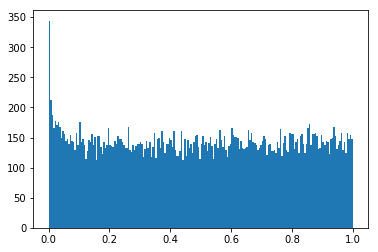

In [39]:
plt.hist(sorted_real_pvalues,bins=200)
plt.show()

In [23]:
np.savetxt('real_pvalues.txt',real_pvalues)

In [59]:
lung_pi0 = {}
tissue = 'Lung'
for component in range(1024):
    real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,component),'rb'))[1])
    lung_pi0[component] = qestimate(real_pvalues)[1]
    if component % 100 == 0:
        print (component)

0
100
200
300
400
500
600
700
800
900
1000


In [60]:
liver_pi0 = {}
tissue = 'Liver'
for component in range(1024):
    real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,component),'rb'))[1])
    liver_pi0[component] = qestimate(real_pvalues)[1]
    if component % 100 == 0:
        print (component)

0
100
200
300
400
500
600
700
800
900
1000


In [61]:
ovary_pi0 = {}
tissue = 'Ovary'
for component in range(1024):
    real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,component),'rb'))[1])
    ovary_pi0[component] = qestimate(real_pvalues)[1]
    if component % 100 == 0:
        print (component)

0
100
200
300
400
500
600
700
800
900
1000


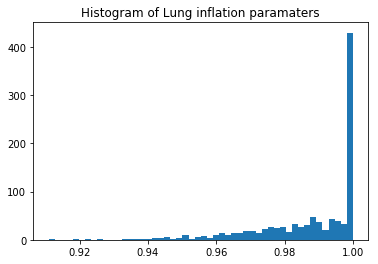

In [67]:
plt.title("Histogram of Lung inflation paramaters")
plt.hist(list(lung_pi0.values()), bins=50)
plt.show()

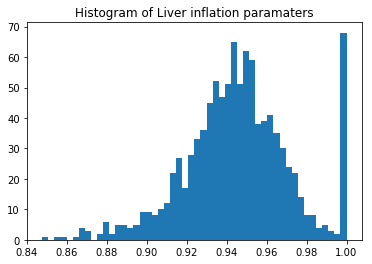

In [68]:
plt.title("Histogram of Liver inflation paramaters")
plt.hist(list(liver_pi0.values()), bins=50)
plt.show()

In [73]:
len(list(ovary_pi0.values()))

1024

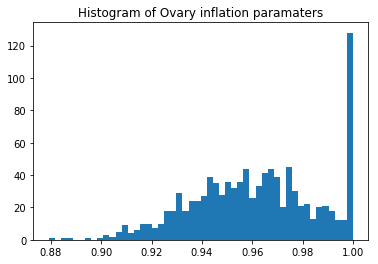

In [69]:
plt.title("Histogram of Ovary inflation paramaters")
plt.hist(list(ovary_pi0.values()), bins=50)
plt.show()

In [55]:
print ('../data/processed/association_results/expression/inception_50_-1.h5/{}/mean/pvalues/component{}_sh1_fl0.png'.format(tissue,component))

../data/processed/association_results/expression/inception_50_-1.h5/Liver/mean/pvalues/component70_sh1_fl0.png


In [53]:
from IPython.display import Image

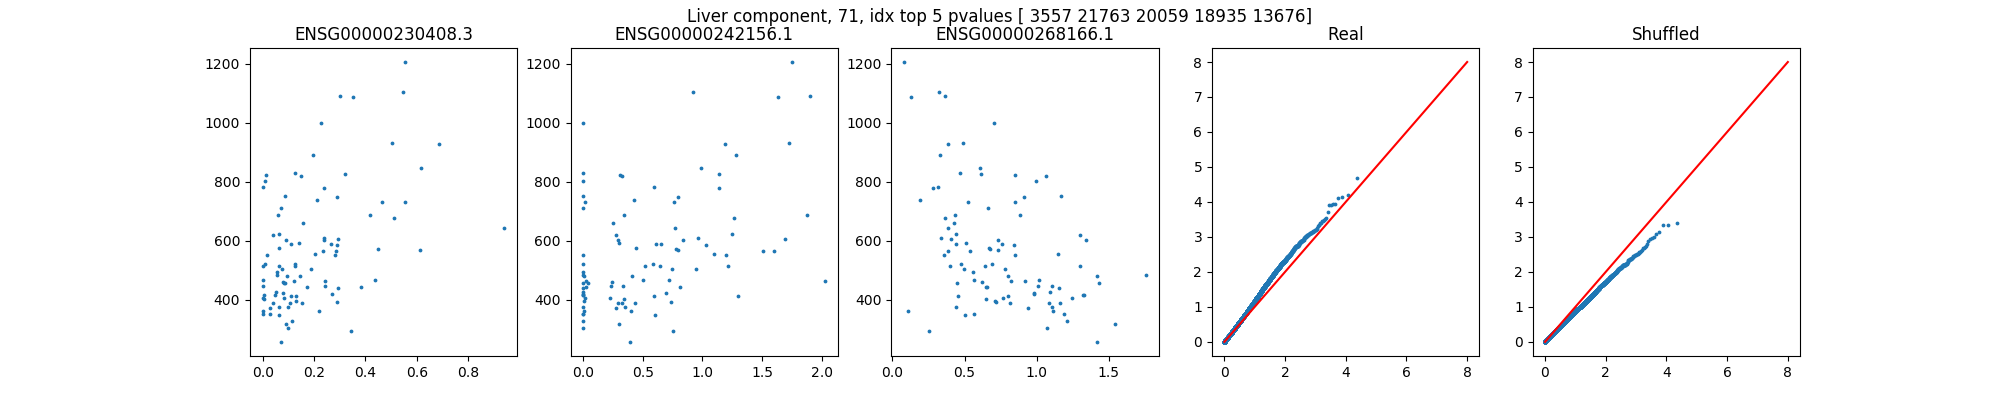

In [60]:
Image('../data/processed/association_results/expression/inception_50_-1.h5/Liver/mean/graphs/component71_sh1_fl0.png')